In [178]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk
import quandl


%matplotlib inline
plt.style.use("ggplot")

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from keras.models import Sequential
from keras.layers import Dense

In [180]:


quandl.ApiConfig.api_key = '-sB9AdohxNUey-w8-99z'
sp500 = quandl.get("MULTPL/SP500_PE_RATIO_MONTH",start_date='1991-01-01', end_date='2008-7-31' )
metals = quandl.get('LBMA/GOLD',start_date='1991-01-01', end_date='2008-7-31')
metals = metals.drop(columns = ['EURO (AM)','EURO (PM)','GBP (AM)', 'USD (PM)','GBP (PM)'])
plat=quandl.get("LPPM/PLAT",start_date='1991-01-01', end_date='2008-7-31')
plat =plat.drop(columns = ['EUR AM','EUR PM','GBP AM', 'USD PM','GBP PM'])
sp500['SMA'] = sp500.iloc[:,0].rolling(window = 3).mean()-sp500.iloc[:,0]
metals['PLAT'] = plat['USD AM']
metals['Index'] = range(1,4446)
metals['dates'] = pd.date_range(start='1991-01-01', periods= 4445)
metals= metals.set_index('Index')



In [181]:
y=metals['USD (AM)']
y.head

<bound method NDFrame.head of Index
1       392.50
2       386.75
3       388.10
4       391.00
5       392.80
         ...  
4441    932.25
4442    929.25
4443    928.75
4444    914.10
4445    912.00
Name: USD (AM), Length: 4445, dtype: float64>

In [205]:
test =metals[metals['dates']=='1992-03-01'].index.values

In [222]:


startTrain = metals[metals['dates']=='2001-03-01'].index.values
startTrain = startTrain[0]
endTrain = metals[metals['dates']=='2002-10-3'].index.values
endTrain = endTrain[0]
startPredict = metals[metals['dates']=='2001-01-02'].index.values
startPredict = startPredict[0]
endPredict = metals[metals['dates']=='2001-10-02'].index.values
endPredict = endPredict[0]


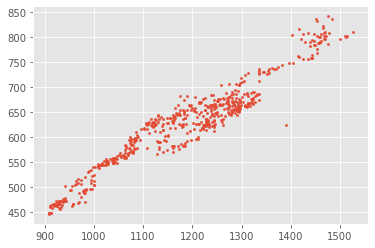

In [223]:
plt.scatter(metals.iloc[startTrain:endTrain,1].values, metals.iloc[startTrain:endTrain,0].values, s = 5)
plt.show()

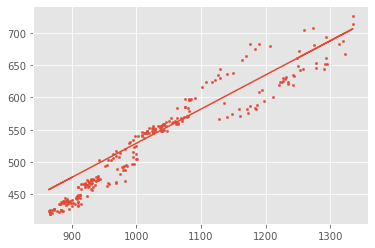

In [224]:

X=metals.iloc[startTrain:endTrain,1].values[:,np.newaxis]
y=metals.iloc[startTrain:endTrain,0].values[:,np.newaxis]
T = metals.iloc[startPredict:endPredict,1].values[:,np.newaxis]
y2 = metals.iloc[startPredict:endPredict,0].values[:,np.newaxis]
regr = MLPRegressor(random_state=2, max_iter=1000,solver = 'lbfgs',alpha= .01).fit(X, y)
predict = regr.predict(T)

plt.scatter(metals.iloc[startPredict:endPredict,1].values, metals.iloc[startPredict:endPredict,0].values, s = 5)
plt.plot(metals.iloc[startPredict:endPredict,1].values,predict)
plt.show()


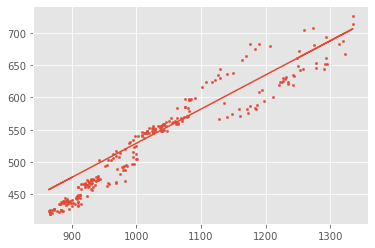

In [225]:
X=metals.iloc[startTrain:endTrain,1].values[:,np.newaxis]
y=metals.iloc[startTrain:endTrain,0].values[:,np.newaxis]
T = metals.iloc[startPredict:endPredict,1].values[:,np.newaxis]
y2 = metals.iloc[startPredict:endPredict,0].values[:,np.newaxis]

linear = LinearRegression().fit(X, y)
predict2 = linear.predict(T)

plt.scatter(metals.iloc[startPredict:endPredict,1].values, metals.iloc[startPredict:endPredict,0].values, s = 5)
plt.plot(metals.iloc[startPredict:endPredict,1].values,predict)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

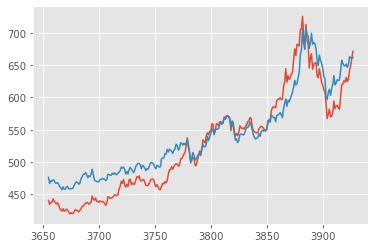

In [226]:
plt.plot(np.arange(startPredict,endPredict,1),y2)
plt.plot(np.arange(startPredict,endPredict,1),predict)
plt.show


In [227]:
Xten=metals.iloc[startTrain:endTrain,[0,1]].values
yten=metals.iloc[startTrain:endTrain,0].values

model = Sequential()
model.add(Dense(20, activation="relu", input_dim=2, kernel_initializer="uniform"))
model.add(Dense(1, activation="linear", kernel_initializer="uniform"))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

model.fit(Xten,yten, epochs=50, batch_size=10,  verbose=2)

T = metals.iloc[startPredict:endPredict,[0,1]].values
y2 = metals.iloc[startPredict:endPredict,0].values

tenPredict = model.predict(T)


Epoch 1/50
59/59 - 0s - loss: 358388.5000 - accuracy: 0.0000e+00
Epoch 2/50
59/59 - 0s - loss: 166951.5938 - accuracy: 0.0000e+00
Epoch 3/50
59/59 - 0s - loss: 14967.4014 - accuracy: 0.0000e+00
Epoch 4/50
59/59 - 0s - loss: 266.2472 - accuracy: 0.0000e+00
Epoch 5/50
59/59 - 0s - loss: 249.1866 - accuracy: 0.0000e+00
Epoch 6/50
59/59 - 0s - loss: 250.0803 - accuracy: 0.0000e+00
Epoch 7/50
59/59 - 0s - loss: 247.9877 - accuracy: 0.0000e+00
Epoch 8/50
59/59 - 0s - loss: 248.7469 - accuracy: 0.0000e+00
Epoch 9/50
59/59 - 0s - loss: 247.1775 - accuracy: 0.0000e+00
Epoch 10/50
59/59 - 0s - loss: 247.6042 - accuracy: 0.0000e+00
Epoch 11/50
59/59 - 0s - loss: 247.5118 - accuracy: 0.0000e+00
Epoch 12/50
59/59 - 0s - loss: 245.8168 - accuracy: 0.0000e+00
Epoch 13/50
59/59 - 0s - loss: 245.9430 - accuracy: 0.0000e+00
Epoch 14/50
59/59 - 0s - loss: 244.8293 - accuracy: 0.0000e+00
Epoch 15/50
59/59 - 0s - loss: 248.7481 - accuracy: 0.0000e+00
Epoch 16/50
59/59 - 0s - loss: 245.1537 - accuracy: 0.00

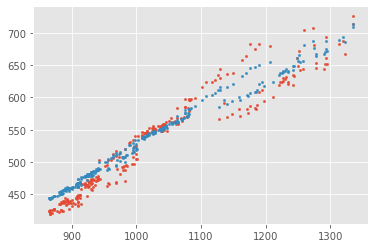

In [228]:
plt.scatter(metals.iloc[startPredict:endPredict,1].values, metals.iloc[startPredict:endPredict,0].values, s = 5)
plt.scatter(metals.iloc[startPredict:endPredict,1].values,tenPredict, s = 5)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

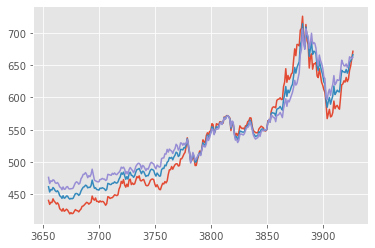

In [229]:
plt.plot(np.arange(startPredict,endPredict,1),y2)
plt.plot(np.arange(startPredict,endPredict,1),tenPredict)
plt.plot(np.arange(startPredict,endPredict,1),predict)
plt.show